In [16]:
%pip install numpy
%pip install pandas
%pip install spacy
%pip install scikit-learn
%pip install matplotlib
%pip install clean-text

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Repos\scrapingTwitter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Repos\scrapingTwitter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Repos\scrapingTwitter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Repos\scrapingTwitter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Repos\scrapingTwitter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 175.4/175.4 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 53.1/53.1 KB ? eta 0:00:00
Using legacy 'setup.py install' for emoji, since package 'wheel' is not installed.
  Running setup.py install for emoji: started
  Running setup.py install for emoji: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Repos\scrapingTwitter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from mongoengine import connect
from Mongo.MongoActions import MongoActions
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
nlp = spacy.load('pt_core_news_lg')
b5PostDf = pd.read_csv('b5corpus/post-utf8-singleFile.csv', on_bad_lines='skip', sep=';')
types = ['ext', 'agr', 'con', 'neu', 'ope']
perLabelsData = {}

lowerString = [entry.lower() for entry in b5PostDf['string']]
X = lowerString 

In [ ]:

lemmaString = {'string':[]}

for sentence in lowerString:
  doc = nlp(sentence)
  newSentence = ''
  for word in doc:
    if word.text not in nlp.Defaults.stop_words:
      newSentence += " "+word.lemma_
  lemmaString['string'].append(newSentence)
  
df = pd.DataFrame(lemmaString)    
df.to_csv('lemma_str', index=False)
X = lemmaString['string']

In [4]:
perPredictorsSvm = {}
tfidf = TfidfVectorizer()

for per in types:
    perLabelsData[per] = b5PostDf[per]

In [5]:

perPredictorsSvm = {}

for per in types:
    perLabelsData[per] = b5PostDf[per]
    
for per in types:
    #building pipeline
    print("for "+per)
    X_train, X_test , y_train, y_test =  train_test_split(X, perLabelsData[per], test_size=0.3, random_state=10)
    perPredictorsSvm[per] = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
    perPredictorsSvm[per].fit(X_train, y_train)
    predict = perPredictorsSvm[per].predict(X_test)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))



for ext
[[10943 15114]
 [ 9690 21487]]
              precision    recall  f1-score   support

         no        0.53      0.42      0.47     26057
        yes        0.59      0.69      0.63     31177

    accuracy                           0.57     57234
   macro avg       0.56      0.55      0.55     57234
weighted avg       0.56      0.57      0.56     57234

for agr
[[13067 14379]
 [11116 18672]]
              precision    recall  f1-score   support

         no        0.54      0.48      0.51     27446
        yes        0.56      0.63      0.59     29788

    accuracy                           0.55     57234
   macro avg       0.55      0.55      0.55     57234
weighted avg       0.55      0.55      0.55     57234

for con
[[16942 12018]
 [12641 15633]]
              precision    recall  f1-score   support

         no        0.57      0.59      0.58     28960
        yes        0.57      0.55      0.56     28274

    accuracy                           0.57     57234
   macro av

In [6]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

In [7]:
fakeUsersTweets = pd.read_csv('../userTweetsFakeClean_str.csv')
perQtd = {}
pre = fakeUsersTweets['string']
width = 1.0 
for t in types:
    perQtd[t] = 0
    
for per in types:
    for string in pre:
        if('yes' in perPredictorsSvm[per].predict([str(string)])[0]):
            perQtd[per]+=1
            

        

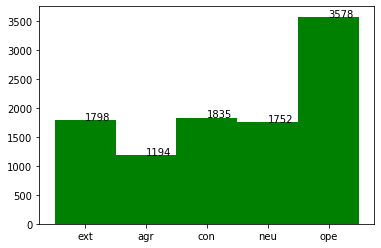

In [8]:
matplotlib.pyplot.bar(perQtd.keys(), perQtd.values(), width, color='g')
xlocs = range(1,6)
for i, v in enumerate(perQtd.values()):
     matplotlib.pyplot.text(xlocs[i] - 1, v + 0.5, str(v))

In [9]:
fakeUsersTweets = pd.read_csv('../userTweetsTrueClean_str.csv')
perQtd = {}
pre = fakeUsersTweets['string']
width = 1.0 
for t in types:
    perQtd[t] = 0
    
for per in types:
    for string in pre:
        if('yes' in perPredictorsSvm[per].predict([str(string)])[0]):
            perQtd[per]+=1
            

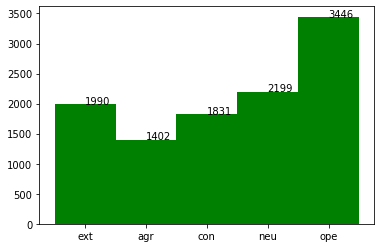

In [10]:
matplotlib.pyplot.bar(perQtd.keys(), perQtd.values(), width, color='g')
xlocs = range(1,6)
for i, v in enumerate(perQtd.values()):
     matplotlib.pyplot.text(xlocs[i] - 1, v + 0.5, str(v))

In [11]:
fakeUsersTweets = pd.read_csv('../userTweetsFakeClean_str.csv')
trueUsersTweets = pd.read_csv('../userTweetsTrueClean_str.csv')
personalityVector = {'ext':[], 'agr':[], 'con':[],'neu':[], 'ope':[], 'fake':[]} #agr;con;neu;ope;
preFake = fakeUsersTweets['string']
preTrue = fakeUsersTweets['string']
    
for string in preFake:    
    for per in types:
        if('yes' in perPredictorsSvm[per].predict([str(string)])[0]):
            personalityVector[per].append(1)
        else:
            personalityVector[per].append(0)
    
    personalityVector['fake'].append(1)

for string in preTrue:    
    for per in types:
        if('yes' in perPredictorsSvm[per].predict([str(string)])[0]):
            personalityVector[per].append(1)
        else:
            personalityVector[per].append(0)
    
    personalityVector['fake'].append(0)
    
df = pd.DataFrame(personalityVector)
df.to_csv('personality_Vector', index=False)


            

In [12]:
personaVectorDf = pd.read_csv('../personality_bin_vector.csv')
personaVectorDf.head()

,ext,agr,con,neu,ope,fake
0,1,1,1,1,0,1
1,0,0,1,0,1,1
2,0,0,0,0,1,1
3,0,0,0,1,1,1
4,1,1,0,0,1,1


In [13]:
X = personaVectorDf[types]
y = personaVectorDf.fake
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=100)
tree = tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.46932409012131715
[[684 763]
 [768 670]]
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      1447
           1       0.47      0.47      0.47      1438

    accuracy                           0.47      2885
   macro avg       0.47      0.47      0.47      2885
weighted avg       0.47      0.47      0.47      2885



In [14]:
svm2 = LinearSVC()
svm2 = svm2.fit(X_train,y_train)

y_pred = svm2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.48873483535528595


In [15]:
forest = RandomForestClassifier()
forest = forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.46932409012131715
[[670 777]
 [754 684]]
              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1447
           1       0.47      0.48      0.47      1438

    accuracy                           0.47      2885
   macro avg       0.47      0.47      0.47      2885
weighted avg       0.47      0.47      0.47      2885



In [5]:

from cleantext import clean
import re

def normalize(comment, lowercase, remove_stopwords):
    stops = nlp.Defaults.stop_words
    if lowercase:
        comment = comment.lower()
    #remove emojis
    comment = comment.encode('ascii', 'ignore').decode('ascii')
    comment = nlp(comment)
    lemmatized = list()
    
    for word in comment:
        if not word.like_url:
            lemma = word.lower_.strip()
            if lemma:
                if not remove_stopwords or (remove_stopwords and lemma not in stops):
                    if not ("@" in lemma) and not ("#" in lemma) and not ("https:/" in lemma):                        
                        lemmatized.append(lemma)
    return " ".join(lemmatized)

empty = list()
Data = pd.read_csv('../userTweetsFake_str.csv', on_bad_lines='skip')

userTweetsDic = {'string':[]}

for string in Data['string']:
    if(isinstance(string, str)):
        try: 
            
            userTweetsDic['string'].append(normalize(string, False, True))                   
        except:
            print("failed in:\n "+string)
df = pd.DataFrame(userTweetsDic)
df.to_csv('userTweetsFakeClean_str', index=False)

# stopwords = nlp.Defaults.stop_words
# Data = pd.read_csv('../userTweetsFake_str.csv', on_bad_lines='skip')
# cleaning = Data['string'].apply(normalize, lowercase=False, remove_stopwords=True)
# cleaning

In [ ]:
fake_users = pd.read_csv('../usersFake_str.csv', on_bad_lines='skip', sep=',')
true_users = pd.read_csv('../usersTru_str.csv', on_bad_lines='skip', sep=',')

true_users.head()

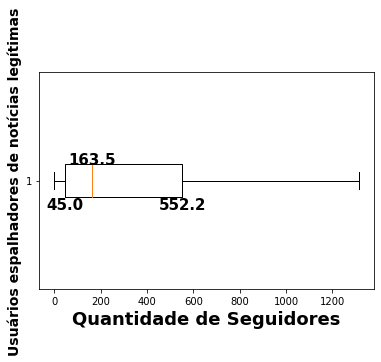

In [45]:
from pylab import *
plt.xlabel('Quantidade de Seguidores', fontsize = 18, fontweight = 'bold')
plt.ylabel('Usuários espalhadores de notícias legítimas', fontsize = 14, fontweight = 'bold')
datadict = matplotlib.pyplot.boxplot(true_users['followers'], showfliers=False, vert=False)


for line in datadict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % x,horizontalalignment='center',fontsize = 15, fontweight = 'bold')

for line in datadict['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
         verticalalignment='top', fontsize = 15, fontweight = 'bold')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
             verticalalignment='top', fontsize = 15, fontweight = 'bold')  
    




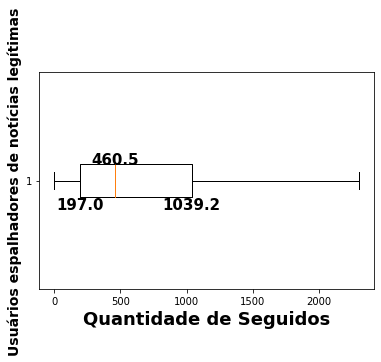

In [48]:
plt.xlabel('Quantidade de Seguidos', fontsize = 18, fontweight = 'bold')
plt.ylabel('Usuários espalhadores de notícias legítimas', fontsize = 14, fontweight = 'bold')
datadict = matplotlib.pyplot.boxplot(true_users['following'], showfliers=False, vert=False)


for line in datadict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % x,horizontalalignment='center',fontsize = 15, fontweight = 'bold')

for line in datadict['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
         verticalalignment='top', fontsize = 15, fontweight = 'bold')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
             verticalalignment='top', fontsize = 15, fontweight = 'bold')   

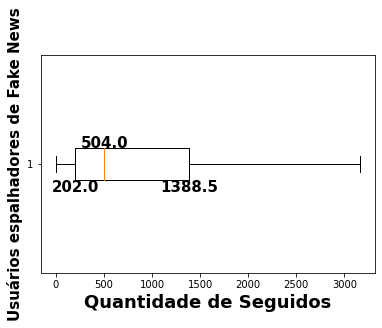

In [49]:
plt.xlabel('Quantidade de Seguidos', fontsize = 18, fontweight = 'bold')
plt.ylabel('Usuários espalhadores de Fake News', fontsize = 15, fontweight = 'bold')
datadict = matplotlib.pyplot.boxplot(fake_users['following'], showfliers=False, vert=False)


for line in datadict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % x,horizontalalignment='center',fontsize = 15, fontweight = 'bold')

for line in datadict['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
         verticalalignment='top', fontsize = 15, fontweight = 'bold')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
             verticalalignment='top', fontsize = 15, fontweight = 'bold')  

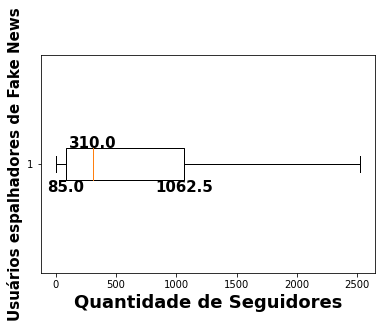

In [50]:
plt.xlabel('Quantidade de Seguidores', fontsize = 18, fontweight = 'bold')
plt.ylabel('Usuários espalhadores de Fake News', fontsize = 15, fontweight = 'bold')
datadict = matplotlib.pyplot.boxplot(fake_users['followers'], showfliers=False, vert=False)


for line in datadict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % x,horizontalalignment='center',fontsize = 15, fontweight = 'bold')

for line in datadict['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
         verticalalignment='top', fontsize = 15, fontweight = 'bold')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    text(x,y, '%.1f' % x,
         horizontalalignment='center', # centered
             verticalalignment='top', fontsize = 15, fontweight = 'bold')  